In [1]:
import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np
import os
import pickle
import warnings
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format = 'svg'

def save_obj(obj, filename):
    with open(filename, 'wb+') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(filename):
    with open(filename, 'rb') as f:
        return pickle.load(f)

In [76]:
def showCO2(file,omega = [1122,1285,1388,2244,2680,2761,3329]):
        my_path = os.path.abspath(os.path.join(r'D:\DataProcessing','CO2',r'result'))
        os.chdir(my_path)
        result = load_obj(os.path.abspath(os.path.join(my_path, file+r'_result.pkl')))
        fre = result['frequency']

        fig, ax = plt.subplots(nrows=4, ncols=1, sharex=True, sharey=True,figsize=(10,10))
        fig.add_subplot(111, frameon=False)
        plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
        plt.xlabel("Frequency ($\mathrm{cm^{-1}}$)")
        plt.ylabel("Amplitude (a.u.)", labelpad=25)
        plt.text(1.1,0.35,'Relative Phase v.s. Mass 44 ($\pi$)', rotation = 270)
        axPP = []
        for axx in ax.flatten():
            axPP = axPP + [axx.twinx()]
        axPP[0].get_shared_y_axes().join(axPP[0], axPP[1],axPP[2])

        lab=['Mass 44','Mass 16','Mass 22','Mass 28']
        i=0
        omega = omega
        for gas in ['Ch8','Ch2','Ch4','Ch6']:
            Y = result['amplitude'][gas]
            P = result['phase'][gas]
            axF=ax[i]
            axP = axPP[i]
            label=lab[i]
            for om in omega:
                if i>0:
                    axF.axvline(x=om,ymin=0,ymax=1.3,clip_on=False,c='k',linestyle='--',alpha=0.3)
                else:
                    axF.axvline(x=om,clip_on=False,c='k',linestyle='--',alpha=0.3)
                    if om==1285 or om==2680:
                        axF.text(x=om-70, y=1.2, s=str(int(om)),fontsize='8')
                    else:
                        axF.text(x=om-70, y=1.1, s=str(int(om)),fontsize='8')
                    #if om==1122:
                    #    axF.text(x=om-300, y=1.3, s='$\mathrm{CO_2^{2+}}$\n $\Sigma_g^+$ Sym str',fontsize='8')
                    #if om==1285:
                    #    axF.text(x=om, y=1.3, s='$\mathrm{CO_2}$\n $\sigma_g^+$ Sym str',fontsize='8')
                    #if om==1388:
                    #    axF.text(x=om-70, y=1.3, s='CO_2 \sigma_g^+ Sym str',fontsize='8')
            inter = 0
            for w in omega:
                inter = inter + np.where(np.abs(fre-w)<10,P,0)
            inter = np.where(inter==0,np.inf,inter)
            #inter = np.where(Y<0.07,np.inf,inter)
            inter[0] = np.where(inter[0]<-1.0,inter[0]+2,inter[0])
            inter[0] = np.where(inter[1]>0.3,np.inf,inter[0])
            P = inter
            
            axF.plot(fre, Y, 'k', clip_on=True, label=label)
            if gas == 'Ch8':
                pass
            else:
                axP.errorbar(fre,P[0],yerr=P[1], color='r', ecolor='r',linewidth=2,label='Phase')
                pass
            #plot(f,P,'r')
            #axF.set_ylim([0,1])
            #axF.set_xlim([200,4500])
            axP.set_yticks([-1,-0.5,0,0.5,1])
            axP.grid(visible=True,linestyle='--',linewidth='0.3',c='b')
            axP.set_ylim([-1.3,1.3])
            axP.legend(loc=(0.02,0.6),ncol=2,fontsize=10)
            #axF.set_yscale('log')
            #axF.set_ylim([10**-2.5,10**0])
            axF.legend(loc=(0.02,0.8),ncol=2,fontsize=10)
    
            i=i+1
        fig.tight_layout()
        #plt.show()
def showH2O(file):
        my_path = os.path.abspath(os.path.join(r'D:\DataProcessing','H2O',r'result'))
        os.chdir(my_path)
        result = load_obj(os.path.abspath(os.path.join(my_path, file+r'_result.pkl')))
        fre = result['frequency']
        
        fig, ax = plt.subplots(nrows=5, ncols=1, sharex=True, sharey=True,figsize=(10,10))
        fig.add_subplot(111, frameon=False)
        plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
        plt.xlabel("Frequency ($\mathrm{cm^{-1}}$)")
        plt.ylabel("Amplitude (a.u.)", labelpad=25)
        plt.text(1.18,0.35,'Relative Phase v.s. Mass 18 ($\pi$)', rotation = 270)
        axPP = []
        for axx in ax.flatten():
            axPP = axPP + [axx.twinx()]
        axPP[0].get_shared_y_axes().join(axPP[0], axPP[1],axPP[2])

        lab=['Mass 18','Mass 1','Mass 2','Mass 16','Mass 17']
        i=0
        _preP = 'window'+'_'
        for gas in ['Ch8','Ch0','Ch2','Ch4','Ch6']:
            Y = result['amplitude'][gas]
            P = result['phase'][gas]
            
            axF=ax[i]
            axP = axPP[i]
            #axP.set_ylim([-np.pi,np.pi])
            label=lab[i]
    

            omega = [526.49165,625.20883,699.99458,810.67748,882.47179,1145.71762,1343.15199,1594.43209,1696.1407,2153.82946,2324.34096,2677.32968,3212.79562,3655.52723]
            if r'4.5E+14_H2O' in file:
                omega=[526.49165,810.67748,1343.15199,1594.43209,2153.82946,2677.32968,3212.79562,3655.52723]
                for om in omega:
                    if i>0:
                        axF.axvline(x=om,ymin=0,ymax=1.3,clip_on=False,c='k',linestyle='--',alpha=0.3)
                    else:
                        axF.axvline(x=om,clip_on=False,c='k',linestyle='--',alpha=0.3)
                        axF.text(x=om-70, y=1.1, s=str(int(om)),fontsize='8')
                        if om==1594.43209:
                            axF.text(x=om-70, y=1.8, s='H2O+ Bend',fontsize='8')
                        if om==3655.52723:
                            axF.text(x=om-70, y=1.8, s='H2O a1 Sym',fontsize='8')
                if gas == 'Ch0':
                    omega = [526.49165,810.67748,1343.15199,2115,2153,3655.52723]
                elif gas == 'Ch2':
                    omega = [3655.52723]
                elif gas == 'Ch4':
                    omega = [3655.52723]
                elif gas == 'Ch6':
                    omega = [526.49165,810.67748,1343.15199,1594.43209,2115,2153,3655.52723]
                inter = 0
                for w in omega:
                    inter = inter + np.where(np.abs(fre-w)<10,P,0)
                inter = np.where(inter==0,np.inf,inter)
                P = inter
            elif r'7.2E+14_H2O'in file:
                omega=[526.49165,810.67748,1343.15199,1594.43209,2153.82946,2677.32968,3212.79562,3655.52723]
                for om in omega:
                    if i>0:
                        axF.axvline(x=om,ymin=0,ymax=1.3,clip_on=False,c='k',linestyle='--',alpha=0.3)
                    else:
                        axF.axvline(x=om,clip_on=False,c='k',linestyle='--',alpha=0.3)
                        axF.text(x=om-70, y=1.1, s=str(int(om)),fontsize='8')
                        if om==1594.43209:
                            axF.text(x=om-70, y=1.8, s='H2O+ Bend',fontsize='8')
                        if om==3655.52723:
                            axF.text(x=om-70, y=1.8, s='H2O a1 Sym',fontsize='8')
                if gas == 'Ch0':
                    omega = [526.49165,810.67748,1343.15199,2115,2153,3212.79562,3655.52723]
                elif gas == 'Ch2':
                    omega = [3655.52723]
                elif gas == 'Ch4':
                    omega = [3655.52723]
                elif gas == 'Ch6':
                    omega = [1594.43209,3655.52723]
                inter = 0
                for w in omega:
                    inter = inter + np.where(np.abs(fre-w)<10,P,0)
                inter = np.where(inter==0,np.inf,inter)
                P = inter
            elif r'8.9E+14_H2O'in file:
                omega=[526.49165,810.67748,1343.15199,1594.43209,2153.82946,2677.32968,3212.79562,3655.52723]
                for om in omega:
                    if i>0:
                        axF.axvline(x=om,ymin=0,ymax=1.3,clip_on=False,c='k',linestyle='--',alpha=0.3)
                    else:
                        axF.axvline(x=om,clip_on=False,c='k',linestyle='--',alpha=0.3)
                        axF.text(x=om-70, y=1.1, s=str(int(om)),fontsize='8')
                        #if om==1594.43209:
                        #    axF.text(x=om-70, y=1.8, s='H2O+ Bend',fontsize='8')
                        #if om==3655.52723:
                        #    axF.text(x=om-70, y=1.8, s='H2O a1 Sym',fontsize='8')
                if gas == 'Ch0':
                    omega = [526.49165,810.67748,1343.15199,2115,2153,1594.43209,3655.52723]
                elif gas == 'Ch2':
                    omega = [3655.52723]
                elif gas == 'Ch4':
                    omega = [3655.52723]
                elif gas == 'Ch6':
                    omega = [810.67748,1343.15199,1594.43209,2115,3212.79562,3655.52723]
                inter = 0
                for w in omega:
                    inter = inter + np.where(np.abs(fre-w)<10,P,0)
                inter = np.where(inter==0,np.inf,inter)
                P = inter
            axF.plot(fre, Y, 'k', clip_on=True, label=label)
            if gas == 'Ch8':
                pass
            else:
                axP.errorbar(fre,P[0],yerr=P[1], color='r', ecolor='r',linewidth=2,label='Phase')
                #axP.axhline(y=0.5, color='b', linestyle='--', label='Phase_aid')
                #axP.axhline(y=1.5, color='b', linestyle='--')
            #plot(fre,P,'r')
            #axF.set_ylim([0,1])
            #axF.set_xlim([200,4500])
            axP.set_yticks([-1,-0.5,0,0.5,1])
            axP.grid(visible=True,linestyle='--',linewidth='0.3',c='b')
            axP.set_ylim([-1.3,1.3])
            axP.legend(loc=(0.02,0.6),ncol=2,fontsize=10)
            #axF.set_yscale('log')
            #axF.set_ylim([10**-2.5,10**0])
            axF.legend(loc=(0.02,0.8),ncol=2,fontsize=10)
    
            i=i+1
        fig.tight_layout()
        plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


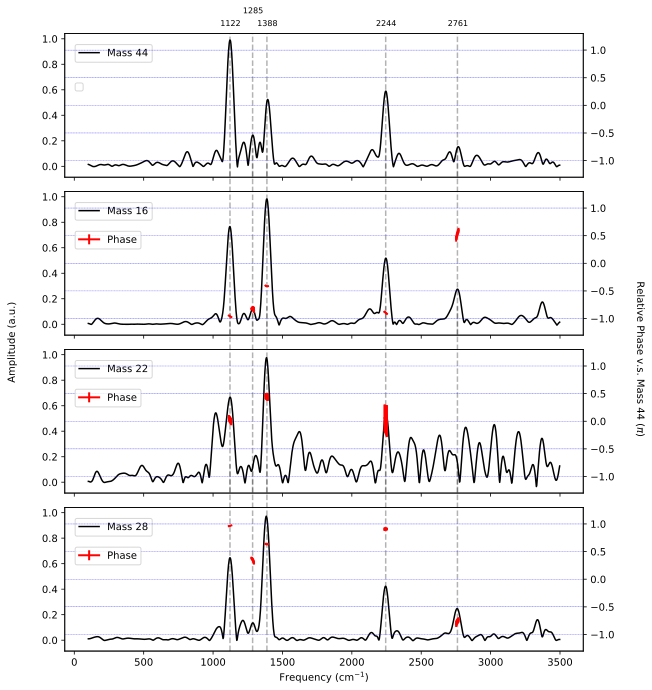

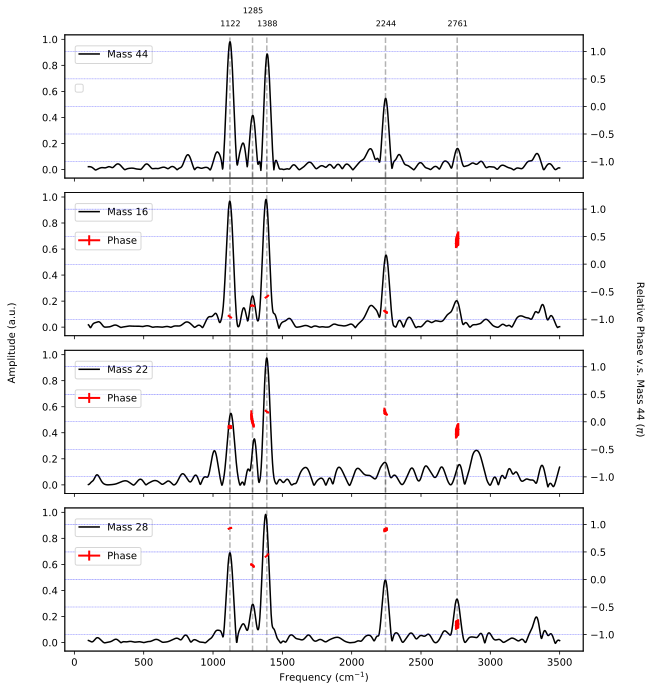

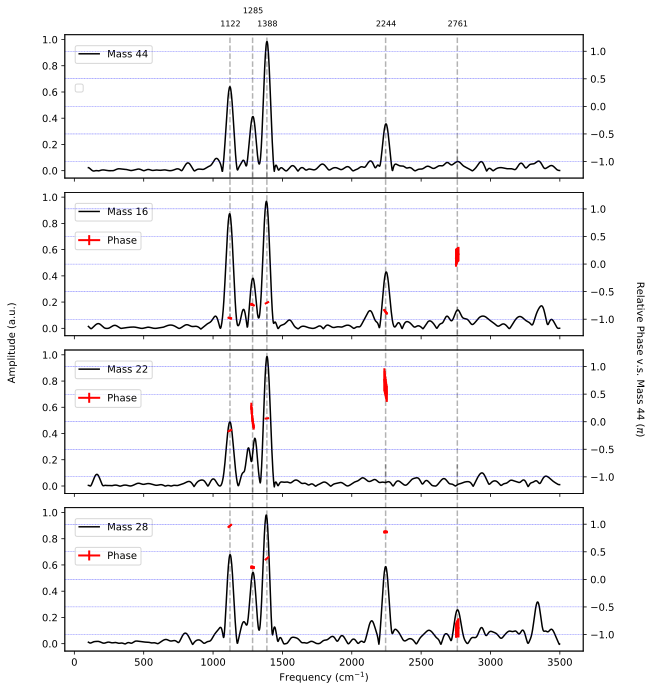

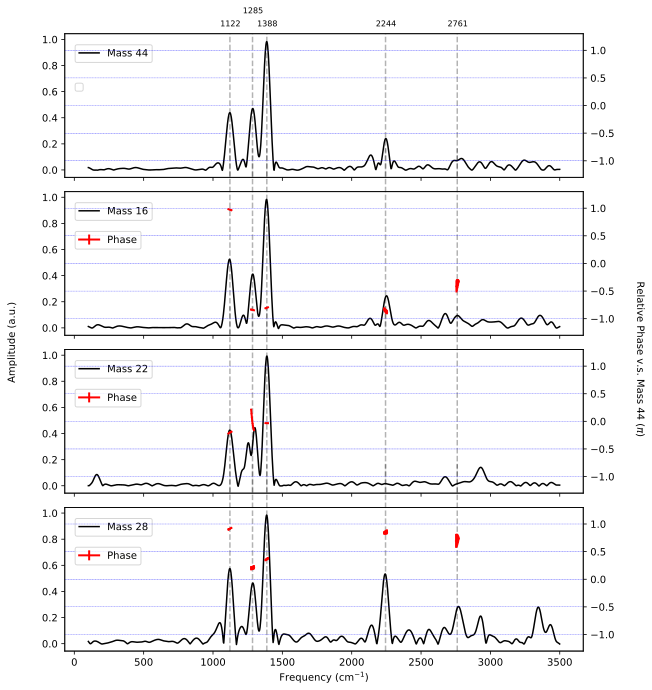

In [77]:
showCO2('pu7.7E+14pr3.7E+14_CO2',omega = [1122,1285,1388,2244,2761])
showCO2('pu7.7E+14pr6.1E+14_CO2',omega = [1122,1285,1388,2244,2761])
showCO2('pu7.6E+14pr9.3E+14_CO2',omega = [1122,1285,1388,2244,2761])
showCO2('pu7.6E+14pr1.4E+15_CO2',omega = [1122,1285,1388,2244,2761])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


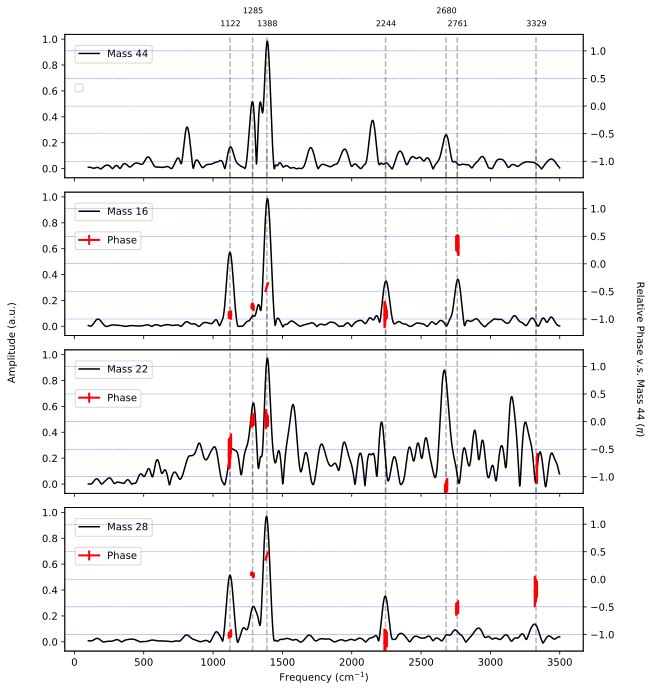

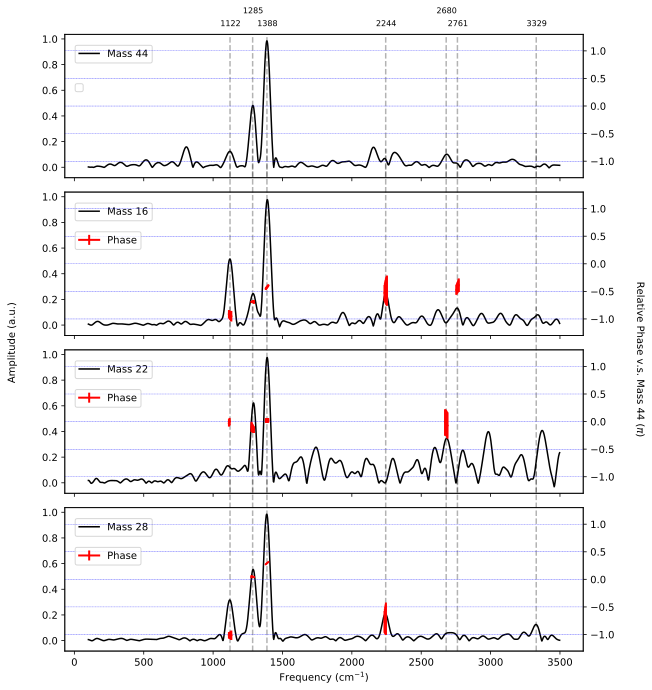

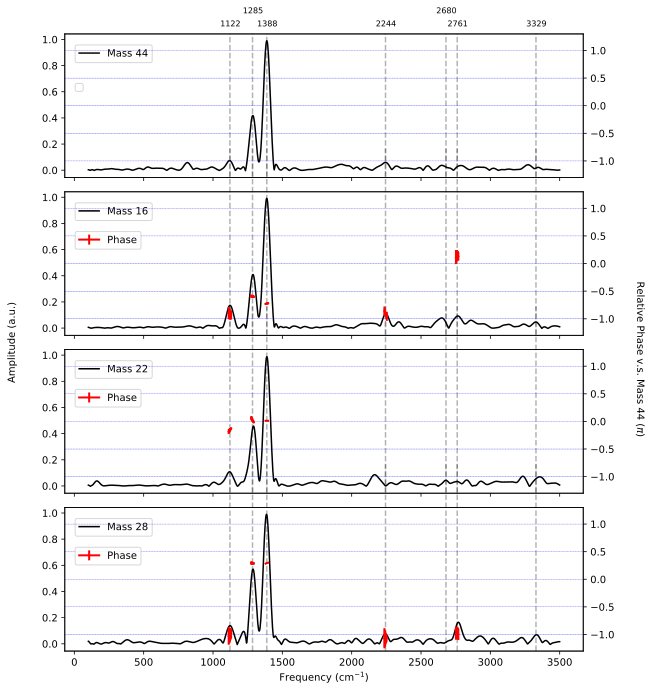

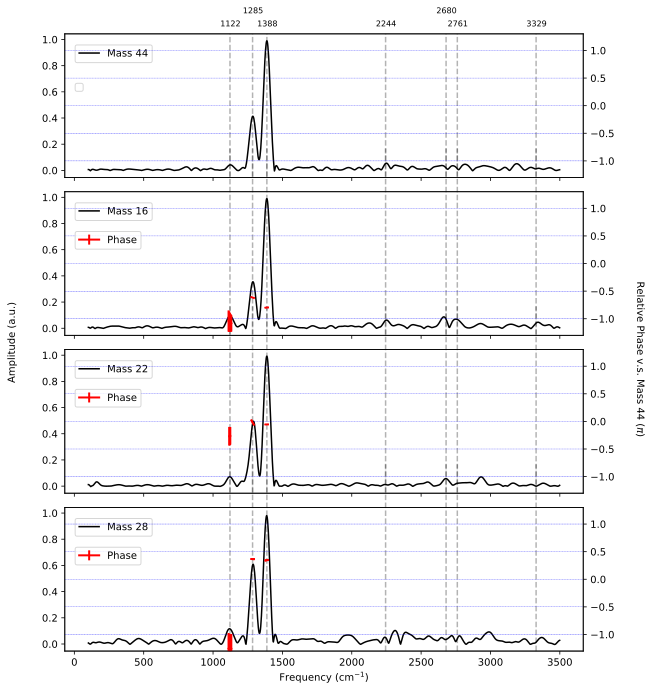

In [75]:
showCO2('pu4.0E+14pr3.8E+14_CO2')
showCO2('pu4.0E+14pr6.2E+14_CO2')
showCO2('pu4.0E+14pr9.7E+14_CO2')
showCO2('pu4.0E+14pr1.4E+15_CO2')